In [41]:
try:
    import pt_core_news_lg
except:
    !python -m spacy download pt_core_news_lg

In [1]:
import re

import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import seaborn as sns
import spacy

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from spacy.lang.pt.stop_words import STOP_WORDS

# stop_words = set(stopwords.words('english'))
# nlp = pt_core_news_lg.load()

input_folder = "../data/"

In [43]:
df = pd.read_excel(input_folder+"news.xlsx")
df.head()

,Título,Categoria
0,"Em novo cronograma, Saúde reduz previsão de va...",Covid
1,Mudança ocorre principalmente na estimativa de...,Covid
2,Queiroga vê possível 3ª onda de Covid-19 e nec...,Covid
3,Ministro participou de audiência na Câmara. Te...,Covid
4,18 estados brasileiros registram mais mortes p...,Covid


In [44]:
def clean_text(text):
    text = text.lower()
    text = text.strip(' ')
    return text

df_mod = df.copy()

for column in df_mod.select_dtypes(include='object'):
    df_mod[column] = df_mod[column].map(lambda com : clean_text(com))

df_mod.head()

,Título,Categoria
0,"em novo cronograma, saúde reduz previsão de va...",covid
1,mudança ocorre principalmente na estimativa de...,covid
2,queiroga vê possível 3ª onda de covid-19 e nec...,covid
3,ministro participou de audiência na câmara. te...,covid
4,18 estados brasileiros registram mais mortes p...,covid


,contagem
Categoria,
ambev,20
videogame,20
covid,28


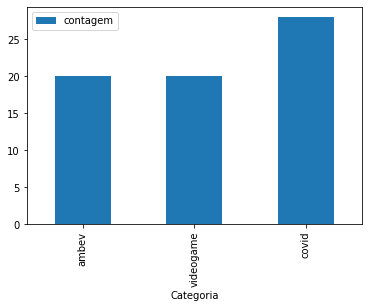

In [74]:
contagem = df_mod.groupby(["Categoria"]).agg({"Título":"nunique"}).rename(columns={"Título": "contagem"})
contagem.sort_values(by='contagem', inplace=True)
contagem.plot(kind='bar');
contagem

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df_mod["Título"], df_mod["Categoria"], random_state=42, test_size=0.4, shuffle=True)

print(f"""Tamanho dos datasets:
Treino: {X_train.shape[0]}
Teste: {X_test.shape[0]}""")

Tamanho dos datasets:
Treino: 40
Teste: 28


In [68]:
categories = list(df_mod["Categoria"].unique())

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=STOP_WORDS)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None)))])

prediction_proba = {}

# train the model using X_dtm & y
NB_pipeline.fit(X_train, y_train)
# compute the testing accuracy
prediction = NB_pipeline.predict(X_test)
prediction_proba = NB_pipeline.predict_proba(X_test)
prediction_proba = pd.DataFrame(prediction_proba, index=X_test.index)
print(f"Test accuracy is {round(accuracy_score(y_test, prediction), 4)}")


Test accuracy is 0.9286


In [69]:
df_resposta = pd.concat([X_test, y_test], axis=1)
df_resposta["predição"] = prediction
df_resposta["probabilidade"] = df_final.loc[:, [0,1,2]].max(axis=1)

df_resposta.sort_values(by="probabilidade", ascending=True)
# df_final = pd.concat([df_resposta, prediction_proba], axis=1)

,Título,Categoria,predição,probabilidade
5,dezoito estados brasileiros registraram mais m...,covid,covid,0.348929
30,ampliação do horário de funcionamento de comér...,covid,videogame,0.387924
54,playstation lança promoção de mídias física e ...,videogame,ambev,0.424202
63,recebemos a seguinte informação: a playstation...,videogame,videogame,0.483746
0,"em novo cronograma, saúde reduz previsão de va...",covid,covid,0.523997
16,ações ambev (abev3): saiba qual o preço hoje,ambev,ambev,0.528891
49,"vários jogos de ps4 e ps5, incluindo lançament...",videogame,videogame,0.531027
48,days of play 2021 oferece jogos com até 80% de...,videogame,videogame,0.545109
58,playstation trabalha em 'agentes' ia que vão j...,videogame,videogame,0.559764
55,a sony deu início às novas ofertas da days of ...,videogame,videogame,0.578180
